In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io.wavfile as wavfile
import numpy as np
import ratemap
from glob import glob

In [2]:
data_dir = 'EnglishCCC_v1.2/confusionWavs'
audio_files = glob(data_dir + '/*.wav')

In [3]:
# fn to plot the ratemap
def test_ratemap(file):
    rate, x = wavfile.read(file)
    y = ratemap.ratemap(x, rate, numchans=32)
    plt.imshow(y.T, cmap=cm.Greys, aspect='auto', interpolation='nearest', origin='lower')
    plt.show()

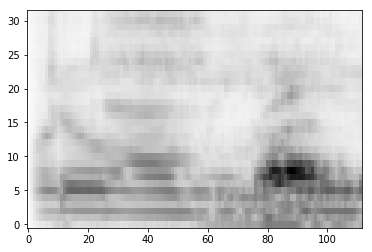

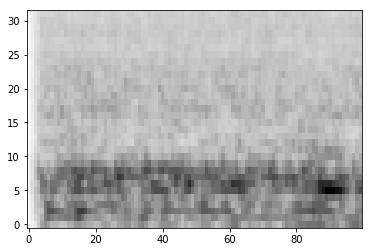

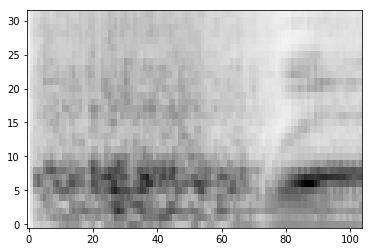

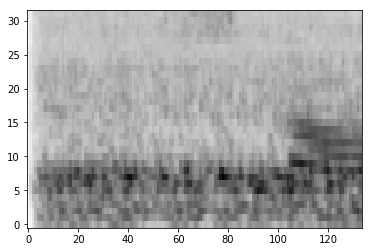

[[0.45279318 1.26328393 1.68601027 ... 4.44665168 4.39422528 4.63864334]
 [0.52796191 1.38016431 2.18163632 ... 5.41060985 4.84316334 4.44489272]
 [0.60798476 1.41487574 2.39332131 ... 6.55619723 5.95328708 5.45770235]
 ...
 [0.71956966 1.18543505 1.2638413  ... 1.79719131 1.68442019 1.88440998]
 [0.73907817 1.27752168 1.40685451 ... 1.54495115 1.48613222 1.86264865]
 [0.68084817 1.13173598 1.44965521 ... 1.57703293 1.67688319 1.79452918]]


In [4]:
# printing the ratemaps for the first 4 audio files
c= 4
for file in audio_files:
    #sample_rate, data = wavfile.read(file)
    test_ratemap(file)
    c -= 1
    if (c == 0):
        break

for file in audio_files:
    rate, x = wavfile.read(file)
    y = ratemap.ratemap(x, rate, numchans=32)
    # is y.T the ratemap matrix?
    print(y.T)
    break
        

    

In [5]:
import inspire

In [6]:
#getting an error
def test_synthesize_ratemap(file):
    rate, x = wavfile.read(file)
    for compression in ['cuberoot', 'log']:
        y = ratemap.ratemap_for_synthesis(x, rate, numchans=32, compression=compression)
        x_hat = ratemap.synthesize_ratemap(x, rate, y, numchans=32, compression=compression)
        wavfile.write('example_resynth_{}.wav'.format(compression), rate, x_hat)
test_synthesize_ratemap(audio_files[0])

ValueError: operands could not be broadcast together with shapes (400,2) (400,) 

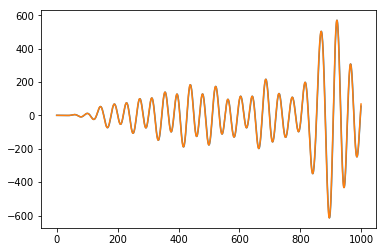

In [7]:
def test_gammatone(file):
    rate, x = wavfile.read(file)
    bm, env, instp, instf = ratemap.gammatone(x, rate, 150.0)
    plt.plot(bm[:1000])
    plt.show()

test_gammatone(audio_files[0])